<a href="https://colab.research.google.com/github/kridtapon/revert-martingale-money-management/blob/main/revert_martingale_money_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

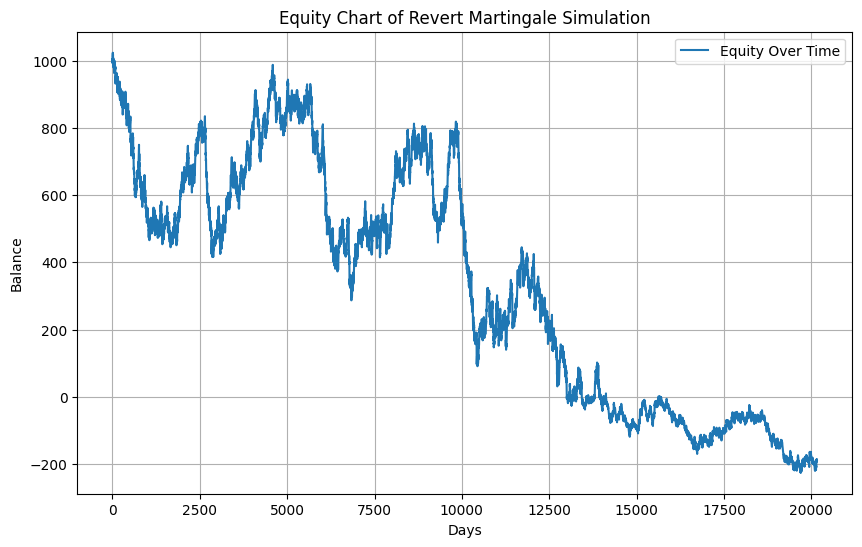

Initial Balance: 1000
Final Balance after 20160 days: -188


In [ ]:
import random
import matplotlib.pyplot as plt

def revert_martingale_simulation(starting_balance, base_bet, win_rate, days):
    balance = starting_balance
    results = []

    for day in range(1, days + 1):
        daily_balance = balance
        current_bet = base_bet
        consecutive_wins = 0
        total_bets = 0

        while True:
            # Simulate the outcome of a round: win or loss
            outcome = random.random() < win_rate  # win_rate is the probability of a win

            if outcome:  # Win
                daily_balance += current_bet
                consecutive_wins += 1
                if consecutive_wins == 3:  # 3 consecutive wins
                    break
                current_bet *= 2  # Double the bet after a win
            else:  # Loss
                daily_balance -= current_bet
                consecutive_wins = 0
                if daily_balance <= 0:  # If balance is zero or negative, stop for the day
                    break
                current_bet = base_bet  # Reset bet to base bet after a loss

        balance = daily_balance  # Update the main balance with daily outcome
        results.append(daily_balance)

    return results

# Parameters
starting_balance = 1000  # Starting balance
base_bet = 1  # Starting bet
win_rate = 0.5  # Win rate (50%)
days = 20160  # Total number of days to simulate

# Run simulation
results = revert_martingale_simulation(starting_balance, base_bet, win_rate, days)

# Plot the equity chart
plt.figure(figsize=(10, 6))
plt.plot(results, label='Equity Over Time')
plt.title('Equity Chart of Revert Martingale Simulation')
plt.xlabel('Days')
plt.ylabel('Balance')
plt.grid(True)
plt.legend()
plt.show()

# Example output
print(f"Initial Balance: {starting_balance}")
print(f"Final Balance after {days} days: {results[-1]}")


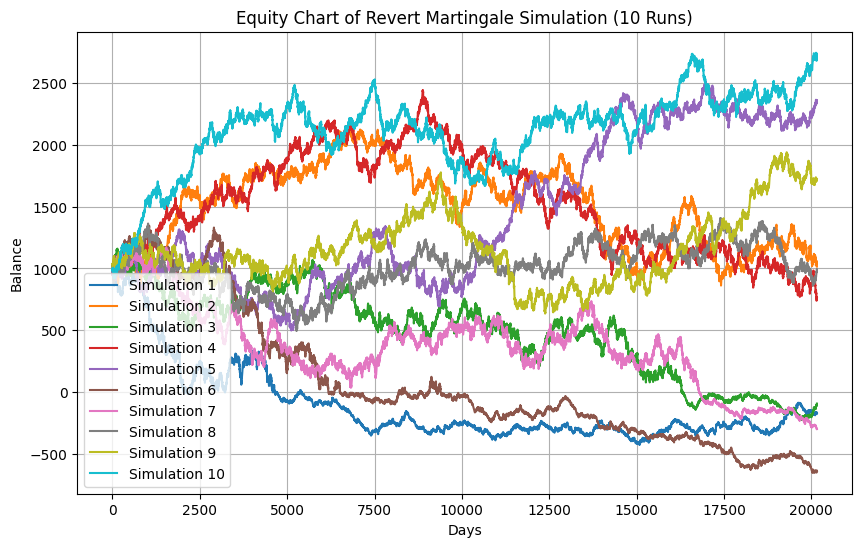

Initial Balance: 1000


In [ ]:
import random
import matplotlib.pyplot as plt

def revert_martingale_simulation(starting_balance, base_bet, win_rate, days):
    balance = starting_balance
    results = []

    for day in range(1, days + 1):
        daily_balance = balance
        current_bet = base_bet
        consecutive_wins = 0
        total_bets = 0

        while True:
            # Simulate the outcome of a round: win or loss
            outcome = random.random() < win_rate  # win_rate is the probability of a win

            if outcome:  # Win
                daily_balance += current_bet
                consecutive_wins += 1
                if consecutive_wins == 3:  # 3 consecutive wins
                    break
                current_bet *= 2  # Double the bet after a win
            else:  # Loss
                daily_balance -= current_bet
                consecutive_wins = 0
                if daily_balance <= 0:  # If balance is zero or negative, stop for the day
                    break
                current_bet = base_bet  # Reset bet to base bet after a loss

        balance = daily_balance  # Update the main balance with daily outcome
        results.append(daily_balance)

    return results

# Parameters
starting_balance = 1000  # Starting balance
base_bet = 1  # Starting bet
win_rate = 0.5  # Win rate (50%)
days = 20160  # Total number of days to simulate
num_simulations = 10  # Number of simulations to run

# Simulate multiple runs and plot each result
plt.figure(figsize=(10, 6))

for i in range(num_simulations):
    results = revert_martingale_simulation(starting_balance, base_bet, win_rate, days)
    plt.plot(results, label=f'Simulation {i + 1}')

plt.title('Equity Chart of Revert Martingale Simulation (10 Runs)')
plt.xlabel('Days')
plt.ylabel('Balance')
plt.grid(True)
plt.legend()
plt.show()

# Example output
print(f"Initial Balance: {starting_balance}")


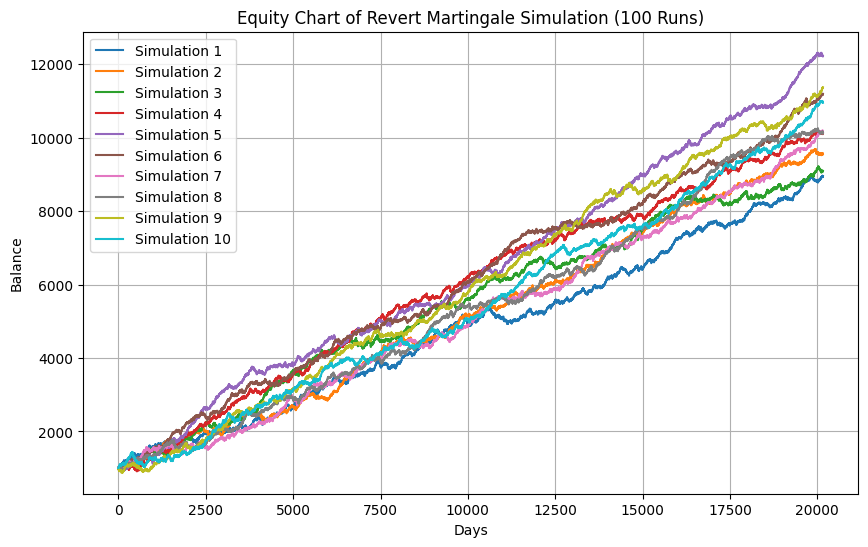

Number of simulations that reached a balance of 0: 0


In [ ]:
import random
import matplotlib.pyplot as plt

def revert_martingale_simulation(starting_balance, base_bet, win_rate, days):
    balance = starting_balance
    results = []

    for day in range(1, days + 1):
        daily_balance = balance
        current_bet = base_bet
        consecutive_wins = 0

        while True:
            # Simulate the outcome of a round: win or loss
            outcome = random.random() < win_rate  # win_rate is the probability of a win

            if outcome:  # Win
                daily_balance += current_bet
                consecutive_wins += 1
                if consecutive_wins == 3:  # 3 consecutive wins
                    break
                current_bet *= 2  # Double the bet after a win
            else:  # Loss
                daily_balance -= current_bet
                consecutive_wins = 0
                if daily_balance <= 0:  # If balance is zero or negative, stop for the day
                    daily_balance = 0
                    break
                current_bet = base_bet  # Reset bet to base bet after a loss

        balance = daily_balance  # Update the main balance with daily outcome
        results.append(daily_balance)

        # Stop the simulation early if balance reaches 0
        if balance == 0:
            break

    return results, balance

# Parameters
starting_balance = 1000  # Starting balance
base_bet = 1  # Starting bet
win_rate = 0.51  # Win rate (50%)
days = 20160  # Total number of days to simulate
num_simulations = 10  # Number of simulations to run

# Simulate multiple runs and plot each result
plt.figure(figsize=(10, 6))

zero_balance_count = 0  # Counter for the number of simulations that reach zero balance

for i in range(num_simulations):
    results, final_balance = revert_martingale_simulation(starting_balance, base_bet, win_rate, days)
    plt.plot(results, label=f'Simulation {i + 1}')

    if final_balance == 0:  # Count if the simulation reached a balance of 0
        zero_balance_count += 1

plt.title('Equity Chart of Revert Martingale Simulation (100 Runs)')
plt.xlabel('Days')
plt.ylabel('Balance')
plt.grid(True)
plt.legend()
plt.show()

# Print the number of simulations that reached a balance of 0
print(f"Number of simulations that reached a balance of 0: {zero_balance_count}")


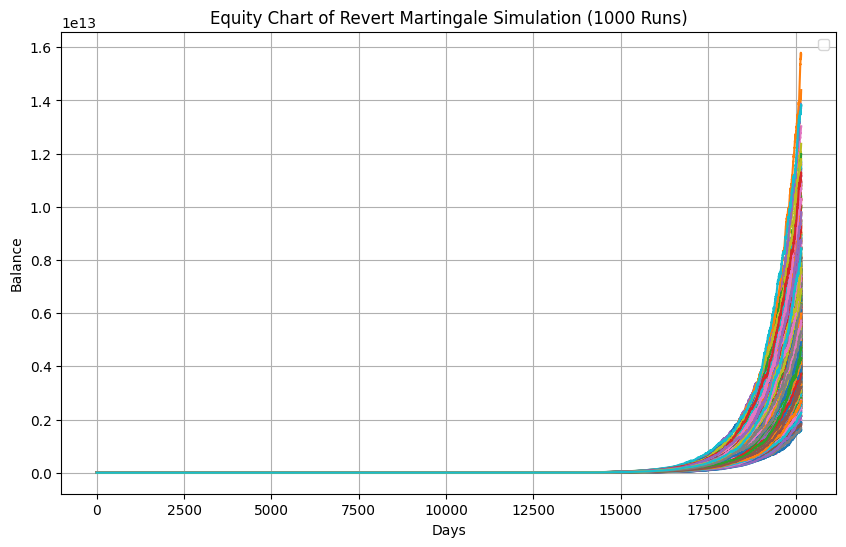

Number of simulations where balance fell below the starting balance: 0


In [ ]:
import random
import matplotlib.pyplot as plt

def revert_martingale_simulation(starting_balance, base_bet_percentage, win_rate, days):
    balance = starting_balance
    results = []

    for day in range(1, days + 1):
        daily_balance = balance
        current_bet = daily_balance * base_bet_percentage  # Bet as a percentage of current balance
        consecutive_wins = 0

        while True:
            # Simulate the outcome of a round: win or loss
            outcome = random.random() < win_rate  # win_rate is the probability of a win

            if outcome:  # Win
                daily_balance += current_bet
                consecutive_wins += 1
                if consecutive_wins == 3:  # 3 consecutive wins
                    break
                current_bet = daily_balance * base_bet_percentage  # Double the bet after a win, but as a percentage of current balance
            else:  # Loss
                daily_balance -= current_bet
                consecutive_wins = 0
                if daily_balance <= 0:  # If balance is zero or negative, stop for the day
                    daily_balance = 0
                    break
                current_bet = daily_balance * base_bet_percentage  # Reset bet to base bet after a loss

        balance = daily_balance  # Update the main balance with daily outcome
        results.append(daily_balance)

        # Stop the simulation early if balance reaches 0
        if balance == 0:
            break

    return results, balance

# Parameters
starting_balance = 1000  # Starting balance
base_bet_percentage = 0.001  # Base bet as a percentage of the current balance (0.1%)
win_rate = 0.55  # Win rate (55%)
days = 20160  # Total number of days to simulate
num_simulations = 1000  # Number of simulations to run

# Simulate multiple runs and plot each result
plt.figure(figsize=(10, 6))

below_starting_balance_count = 0  # Counter for the number of simulations where balance falls below the starting balance

for i in range(num_simulations):
    results, final_balance = revert_martingale_simulation(starting_balance, base_bet_percentage, win_rate, days)
    plt.plot(results)

    # Check if the final balance is below the starting balance
    if final_balance < starting_balance:
        below_starting_balance_count += 1

plt.title('Equity Chart of Revert Martingale Simulation (1000 Runs)')
plt.xlabel('Days')
plt.ylabel('Balance')
plt.grid(True)
plt.legend()
plt.show()

# Print the number of simulations where balance fell below the starting balance
print(f"Number of simulations where balance fell below the starting balance: {below_starting_balance_count}")
